## Intro Matplotlib
Author: Emmanuel Rodriguez

Date: 8 May 2022

Location: Fort Hancock, TX

emmanueljrodriguez.com

## World Development Indicators (WDI)

World Bank's compilation of global development data.

## Step 1: Initial exploration of the dataset

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
# Download dataset from https://datatopics.worldbank.org/world-development-indicators/?msclkid=905295b0cef211eca247786f37737c73

data = pd.read_csv('./WDI_csv/WDIData.csv') # Read .csv file into a DataFrame (multi-dimensional array w/rows and column labels)
data.shape # Get array size

(384370, 67)

This is a large dataset, let's explore what this data holds.

In [5]:
data.head(10) #Use the 'head' method to view the headers of the n rows

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.936004,17.337896,17.687093,18.140971,18.491344,18.825520,19.272212,19.628009,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.499471,6.680066,6.859110,7.016238,7.180364,7.322294,7.517191,7.651598,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.855399,38.046781,38.326255,38.468426,38.670044,38.722783,38.927016,39.042839,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.794160,32.001027,33.871910,38.880173,40.261358,43.061877,44.270860,45.803485,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.663502,17.633986,16.464681,24.531436,25.345111,27.449908,29.641760,30.404935,NaN,NaN
5,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,67.112206,66.283426,67.080235,69.132292,70.928567,71.866136,73.332842,73.942949,NaN,NaN
6,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.OL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is a three-dimensional dataset, where the dimensions are: country, indicator, and year.

### How many unique country names are there?

In [6]:
countries = data['Country Name'].unique().tolist() # Use the 'unique' method on the column of the dataframe that contains the country names 
len(countries)

266

### Do the number of country codes match the number of countries?

In [7]:
countryCodes = data['Country Code'].unique().tolist() # The 'unique()' method finds the unique names in the dataframe index
# 'Country Code' and returns an arrray, then the 'tolist()' method returns a list of the array values 
len(countryCodes)

266

### How many indicators are there?

In [8]:
indicators = data['Indicator Name'].unique().tolist()
len(indicators)

1445

In [9]:
# Cross-check with number of indicator codes
indicatorCodes = data['Indicator Code'].unique().tolist()
len(indicatorCodes)

1445

In [10]:
# List the environment variables created so far

%whos

Variable         Type         Data/Info
---------------------------------------
countries        list         n=266
countryCodes     list         n=266
data             DataFrame                           Co<...>384370 rows x 67 columns]
indicatorCodes   list         n=1445
indicators       list         n=1445
np               module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd               module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt              module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
random           module       <module 'random' from 'C:<...>aconda3\\lib\\random.py'>


### How many years of data do we have?

In [11]:
years = data.columns[4:-1] # Grab the column labels starting at col 4, then remove the last 'Unnamed' value
len(years)

62

In [12]:
print(years)

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')


In [13]:
# Convert the index into a list
years = years.tolist()

In [14]:
print(years)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


### What's the range of years?

In [15]:
print(min(years), " to " , max(years))

1960  to  2021


## Matplotlib: Basic Plotting, Part 1

### Country and an indicator to explore:

USA and CO2 emissions per capita

In [58]:
# Create and set variables to hold indicator and country
hist_indicator = 'CO2 emissions (metric'
#hist_indicator = 'CO2 emissions \(metric' # Alternative, if regex is left as default True
hist_country = 'USA'

# Setup two masks using the string method 'contains()'
mask1 = data['Indicator Name'].str.contains(hist_indicator, regex=False) # Set the regex (Regular expression) arg to 
# False, treating str arg as a literal string.
# Literal string or string literal - When a string appears in the actual code of a program it is called a string literal.
# In the string above, the open paranthesis, which typically appears in the actual code - is causing errors in interpreting
# the string (where it ends/begins), therefore the string must be set as a literal string. See Gaddis, p. 35.
#mask1 = data['Indicator Name'].str.contains(hist_indicator) # By default regex is set to True.

mask2 = data['Country Code'].str.contains(hist_country)

# Create and set a temporary dataframe called stage to hold:
# A mask for all the rows for which the indicated name contains 'CO2 emissions'
# Another mask for the rows whose country code is the USA.
stage = data[mask1 & mask2]
print(len(stage))
print(type(stage))

1
<class 'pandas.core.frame.DataFrame'>


In [59]:
stage.head() # head() function returns the first n rows (default is 5) for the object

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
368668,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,16.102958,16.026379,15.535342,15.131747,14.805882,15.240875,NaN,NaN,NaN,NaN


### Handle missing data

In [66]:
# Use the dropna() function to drop missing data fields
stage = stage.dropna(axis=1) # Set axis parameter to 1 to drop columns with NaN, set it to 0 to drop rows with NaN 

### Plot indicator over time using Matplotlib

In [67]:
# Get the years
years = stage.columns[4:-1].tolist() # Get column labels starting at index 5 to the last minus 1, 
# turn the index to a list of strings containing the years

#years

In [91]:
print(type(years))
print(years)
print(len(years))

<class 'list'>
['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
28


### How do I select a subset of a DataFrame?

Ref: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

In [70]:
stage['1990'] # Each column in a DataFrame is a Series. As a single column is selected, the return object is a pandas Series.

368668    19.409229
Name: 1990, dtype: float64

In [71]:
type(stage['1990']) # To verify the above statement

pandas.core.series.Series

In [72]:
stage[['1990']] # To select multiple columns, use a list of column names within the selection brackets. The inner square
# brackets define a Python list with column names, whereas the outer brackets are used to select the data 
# from a pandas DataFrame - this is known as 'fancy indexing'.

,1990
368668,19.409229


In [73]:
stage[['1990','1990']]

,1990,1990
368668,19.409229,19.409229


In [74]:
# Get the CO2 values
co2 = stage[years].values # Use the 'years' list to select the corresponding year columns

In [75]:
co2

array([[19.40922912, 19.00573561, 19.02508245, 19.2381088 , 19.28061081,
        19.25393761, 19.61109008, 20.34787297, 20.26688031, 20.10571961,
        20.4719331 , 20.17500468, 19.44947847, 19.50870471, 19.60357288,
        19.478026  , 18.9576435 , 19.05602695, 18.29480563, 16.81886848,
        17.43419587, 16.59940374, 15.77114462, 16.10295784, 16.02637907,
        15.53534211, 15.13174682, 14.80588242]])

In [78]:
print(type(co2))
print(co2.shape)

<class 'numpy.ndarray'>
(1, 28)


In [81]:
co2List = [int(co2) for co2 in co2]
co2List

TypeError: only size-1 arrays can be converted to Python scalars

Only 'size-1' arrays... does this mean, the trailing dimension must be 1? Let find out...

In [82]:
co2 = np.transpose(co2)
print(type(co2))
print(len(co2))
print(co2.shape)

<class 'numpy.ndarray'>
28
(28, 1)


In [83]:
co2List = list(co2)

In [85]:
print(co2List)
print(type(co2List))
#print(co2List.shape)

[array([19.40922912]), array([19.00573561]), array([19.02508245]), array([19.2381088]), array([19.28061081]), array([19.25393761]), array([19.61109008]), array([20.34787297]), array([20.26688031]), array([20.10571961]), array([20.4719331]), array([20.17500468]), array([19.44947847]), array([19.50870471]), array([19.60357288]), array([19.478026]), array([18.9576435]), array([19.05602695]), array([18.29480563]), array([16.81886848]), array([17.43419587]), array([16.59940374]), array([15.77114462]), array([16.10295784]), array([16.02637907]), array([15.53534211]), array([15.13174682]), array([14.80588242])]
<class 'list'>


This gives a list filled with 1x1 arrays... not quite what I was looking for...

In [87]:
co2List = [float(co2) for co2 in co2]
co2List

[19.4092291175092,
 19.005735608603,
 19.0250824516401,
 19.2381087954324,
 19.280610810030197,
 19.2539376140725,
 19.611090076245198,
 20.3478729686016,
 20.266880306249,
 20.105719610091697,
 20.471933095298102,
 20.1750046772639,
 19.4494784745785,
 19.5087047137039,
 19.603572883438698,
 19.478026004217803,
 18.9576435024889,
 19.0560269540732,
 18.2948056259689,
 16.8188684811099,
 17.4341958733314,
 16.599403740534,
 15.7711446187591,
 16.1029578354008,
 16.0263790723251,
 15.535342110601,
 15.131746815811901,
 14.8058824221278]

Okay, much better, so a size-1 array, is a column vector. These are the only types of arrays that can be converted to Python scalars.

In [88]:
print(type(co2List))
print(len(co2List))

<class 'list'>
28


## Plot

<BarContainer object of 28 artists>

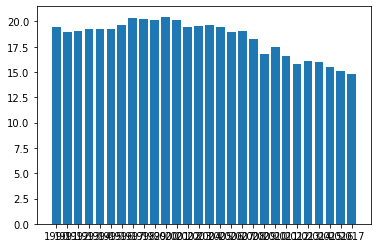

In [92]:
plt.bar(years, co2List) # Test the plot, okay, so plotting two lists works....

In [29]:
# Okay... now I need to convert the 1x62 array, into a 62x1 list
co2Trans = np.transpose(co2) # Transpose using the numpy module and the transpose function
# This will allow for the tolist() function to correctly return the right size list

In [30]:
len(co2Trans)

62

In [31]:
type(co2Trans)

numpy.ndarray

In [32]:
co2List = co2Trans.tolist() # Convert from a numpy.ndarray to a python list

In [33]:
type(co2List)

list

In [34]:
len(co2List)

62

In [35]:
co2Array = np.array(co2List)

In [36]:
co2Array

array([[        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [19.40922912],
       [19.00573561],
       [19.02508245],
       [19.2381088 ],
       [19.28061081],
       [19.25393761],
       [19.61109008],
       [20.34787297],
       [20.26688031],
       [20.10571961],
       [20.4719331 ],
       [20.17500468],
       [19.44947847],
       [19.50870471],
       [19.60357288],
       [19

In [37]:
print(len(co2Array))
print(type(co2Array))
print(co2Array.shape)

62
<class 'numpy.ndarray'>
(62, 1)


In [38]:
# The issue now is that co2List is a NESTED list, meaning it's a list within a list.
# Convert array of strings to a list of integers
co2Numeric = [int(co2Array) for co2Array in co2Array] # Use the int() function to convert the yearsArray into an
# integer, using the for loop: for every element in 'yearsArray' found in the array 'yearsArray'

ValueError: cannot convert float NaN to integer

In [ ]:
# [5/10/22 17:54... CONTINUE HERE]
# Now I need to exclude all NaN values....
# What are you trying to get at? -- You need to arrive to two lists, both containing integers only.
# Is the for loop above necessary? - What is an alternative method to arriving to a list with only integers?

In [303]:
co2Array = np.array(co2List)

In [305]:
co2Array

array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
        19.40922912, 19.00573561, 19.02508245, 19.2381088 , 19.28061081,
        19.25393761, 19.61109008, 20.34787297, 20.26688031, 20.10571961,
        20.4719331 , 20.17500468, 19.44947847, 19.50870471, 19.60357288,
        19.478026  , 18.9576435 , 19.05602695, 18.29480563, 16.81886848,
        17.43419587, 16.59940374, 15.77114462, 16.10295784, 16.02637907,
        15.53534211, 15.13174682, 14.80588242, 15.24087458,         nan,
                nan,         nan]])

### To work with data that contains non-nan values only:

In [170]:
type(co2)

pandas.core.frame.DataFrame

In [171]:
pd.isna(co2) # Call the pandas module, then use the 'isna()' function to detect and output missing values
# in the form of boolean values

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
368668,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,True,True


In [172]:
co2.notna() # Call the 'notna()' method on the dataframe object to output missing values
# in the form of boolean values; True when the element is NOT NaN, False when NaN

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
368668,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False


In [173]:
# How to only grab the year columns that contain data?
co2_no_nan = co2[co2.notna() == True]

In [174]:
test = co2[co2.notna()]
test

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
368668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.771145,16.102958,16.026379,15.535342,15.131747,14.805882,15.240875,NaN,NaN,NaN


In [153]:
values_no_nan.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
368668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.771145,16.102958,16.026379,15.535342,15.131747,14.805882,15.240875,NaN,NaN,NaN


### Plot

In [44]:
print(years)
print(type(years))
print(len(years))
#print(years.shape) # Error: 'list' object has no attribue 'shape'

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
<class 'list'>
62


In [45]:
# Convert list to array
yearsArray = np.array(years) # Create a Numpy array
print(type(yearsArray))
print(yearsArray.shape)

<class 'numpy.ndarray'>
(62,)


In [53]:
print(yearsArray)
print(type(yearsArray[0]))
# Okay, so here's the problem: How to convert the array made up of string values to integer values?

['1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021']
<class 'numpy.str_'>


In [54]:
# Convert array of strings to a list of integers
#yearsNumeric = [int(yearsArray) for yearsArray in yearsArray] # Use the int() function to convert the yearsArray into an
# integer, using the for loop: for every element in 'yearsArray' found in the array 'yearsArray'

yearsNumeric = [int(yearsArray) for yearsArray in yearsArray]
# Interpreting this in English:
# Create an integer of the array 'yearsArray', for every string in 'yearsArray' in the range of 'yearsArray'

print(type(yearsNumeric))
print(len(yearsNumeric))
print(yearsNumeric)

<class 'list'>
62
[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [275]:
type(yearsNumeric)

list

In [265]:
pseudoCO2 = [random.randint(0,20) for i in range(0,62)] # Create a list of 62 random numbers

In [266]:
#pseudoCO2

<BarContainer object of 62 artists>

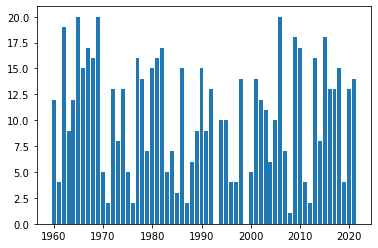

In [283]:
plt.bar(yearsNumeric, pseudoCO2) # Test the plot, okay, so plotting two lists works....

In [285]:
len(yearsNumeric)

62

In [333]:
#yearsNumeric
co2List

[[nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 [19.4092291175092],
 [19.005735608603],
 [19.0250824516401],
 [19.2381087954324],
 [19.280610810030197],
 [19.2539376140725],
 [19.611090076245198],
 [20.3478729686016],
 [20.266880306249],
 [20.105719610091697],
 [20.471933095298102],
 [20.1750046772639],
 [19.4494784745785],
 [19.5087047137039],
 [19.603572883438698],
 [19.478026004217803],
 [18.9576435024889],
 [19.0560269540732],
 [18.2948056259689],
 [16.8188684811099],
 [17.4341958733314],
 [16.599403740534],
 [15.7711446187591],
 [16.1029578354008],
 [16.0263790723251],
 [15.535342110601],
 [15.131746815811901],
 [14.8058824221278],
 [15.2408745833286],
 [nan],
 [nan],
 [nan]]

TypeError: only size-1 arrays can be converted to Python scalars

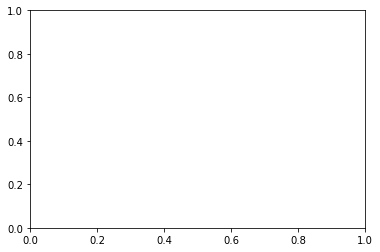

In [330]:
plt.bar(yearsNumeric, co2List)

In [252]:
# Vectorize the values
vector = np.vectorize(np.array) # Create a vector that accepts 'np.array' as a parameter (input argument)
x = vector(yearsArray) # Apply the vector() function to the array
print(x)
type(x)

['1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021']


numpy.ndarray

In [218]:
xTrans = np.transpose(x)
print(xTrans)

['1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021']


In [219]:
xTrans.shape
# It's not transposing the array.... What am I missing???

(62,)

TypeError: only size-1 arrays can be converted to Python scalars

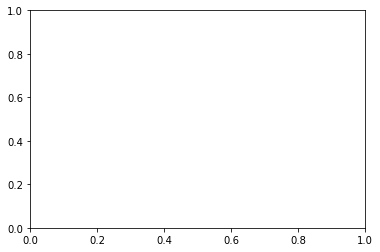

In [250]:
# Create plot
plt.bar(yearsNumeric,co2)
plt.show()

In [197]:
type(years)

list

In [226]:
x = np.array([1,np.nan,3])
x

array([ 1., nan,  3.])

In [235]:
y = np.array([1,2,3])

<BarContainer object of 3 artists>

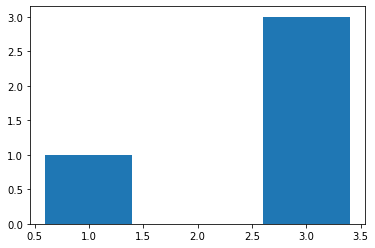

In [236]:
plt.bar(x,y)